<a href="https://colab.research.google.com/github/noahgift/MLConcepts/blob/main/MLConcepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Concepts

### Key Statistical Concepts for ML



*   Correlation
*   Linear and Non-Linear Relationships



## Machine Learning Feedback Loop:  MLOps

* collecting data
* exploring (EDA) and preparing the data:  80% of the work
* training a model on the data
* evaluating model performance (deployment)
* Improving model performance, if needed
* Applying DevOps best practices:  Kaizen

![ML Pipeline Overview](https://user-images.githubusercontent.com/58792/35464450-d79e5804-02aa-11e8-84ba-77cee13af3c3.png)

#### High Level R ML Pipeline (Using Caret Library)




```r
#combine all data from facebook, twitter and wikipedia
combined_model <- function(analytics_file){
	fb_data <- clean_facebook_data(analytics_file,10,10)
	tw_data <- clean_twitter_data(analytics_file,10)
	wiki_data <- clean_wikipedia(analytics_file, 3)
	combined <- merge(fb_data,tw_data,by='author_id')
	combined <- merge(combined,wiki_data,by='author_id')
	return(combined)
}

#determine knn clustering from combined model
caret_knn <- function(knn_set, observed){
	knnFit <- train(knn_set, observed,
                method="knn", preProc=c("center", "scale"),
                tuneLength = 30,trainControl(method="cv"))
	return(knnFit)
}


#Read in the data, clean it up, and create test and training set
prepare_network_data <- function(analytics_file, desired_cols, post_col) {
    data <- clean_data(analytics_file, desired_cols, post_col, min_posts=10)

    #Add grouping column by finding rows
    data$gp <- runif(dim(data)[1])
    test_set <- subset(data, gp <= 0.2)
    training_set <- subset(data, gp > 0.2)
    network_metadata <- list(data,test_set, training_set)
    return(network_metadata)
}

#calculates Mean Absolute Error
MAE <- function(actual, predicted){
    result <- mean(abs(actual - predicted))
    return(result)
}
```



In [ ]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns; sns.set(color_codes=True)
from sklearn.cluster import KMeans
color = sns.color_palette()
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline
df = pd.read_csv("https://raw.githubusercontent.com/noahgift/ucdmsba-machine-learning/master/data/celebrity_rank.csv")
df.head(10)

twitter_rank  facebook_rank  ...  total pageviews  cum percentage pageviews
0            59              6  ...          1932905                    12.36%
1            52              7  ...          1932905                    21.11%
2             3              2  ...          1932905                    29.66%
3             1              3  ...          1932905                    35.80%
4            10              4  ...          1932905                    41.34%
5             6             30  ...          1932905                    46.23%
6             2             35  ...          1932905                    51.02%
7            38             19  ...          1932905                    55.07%
8            11              5  ...          1932905                    57.45%
9            75             10  ...          1932905                    59.64%

[10 rows x 9 columns]

### Non-Linear Relationship Doesn't Work Great with Vanilla Linear Regression



* One reason why 80% of the time should be spent in EDA and collection
* Need to have enough data
* Need to know shape of data:  linear...or non-linear?
* Be humble, especially with money or people's lives at stake

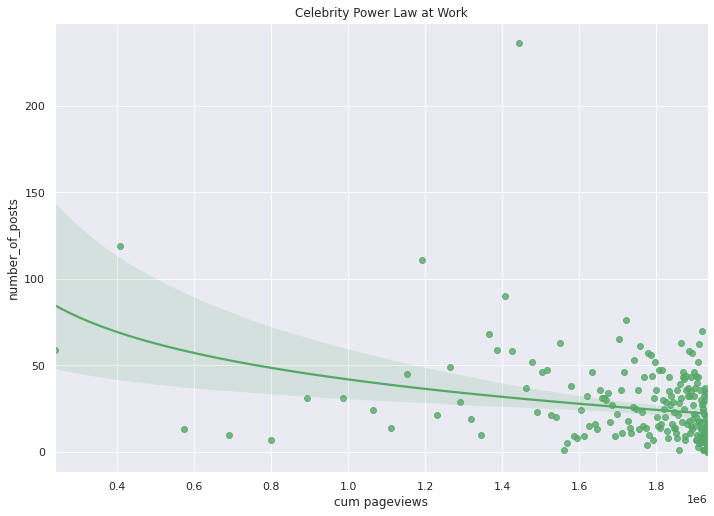

In [ ]:
fig, ax = plt.subplots()
ax.set_title('Celebrity Power Law at Work')
fig.set_size_inches(11.7, 8.27)
sns.regplot(x=df["cum pageviews"], y=df["number_of_posts"], color="g",logx=True, ax=ax)


#### What Happened In Real Life to Prediction Model

## (Note Millions of Dollars are behind this model!)
![Predicted vs Actual](https://user-images.githubusercontent.com/58792/35465715-e5de43c2-02b2-11e8-9a9e-104d9eca387e.png)

#### Actual Pageviews After ML Model Goes Live
![Actual Pageviews](https://user-images.githubusercontent.com/58792/35465722-f077040e-02b2-11e8-87bf-1a17426b7dcb.png)


#### AI/ML Product Development

### Good example of clustering business use case in Action
### Works as a companion to ML model (helping explain it further)
![ML Web Appplication](https://user-images.githubusercontent.com/58792/35465731-fa6d6c28-02b2-11e8-8d9d-af142a5448e2.png)


## Linear Regression

### Linear Regression is the 800 lb Gorilla prediction

* Never a bad place to start
* Can even think about linear regression as a form of EDA
* Even against some non-linear data it performs ok


#### What is linear regression used for?



* One view of machine learning is that ML consists of development of regression models with the Prediction goal
(matloff)
* Predicting a continuous variable
* Forecasting the future

![Linear Regression](http://scikit-learn.org/stable/_images/sphx_glr_plot_ols_001.png)

#### Libraries for ML based Linear Regression


* In Python [scikit-learn](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html).  Many different techniques to explore.

- Ordinary Least Squares
- Ridge Regression
- Lasso
- Bayesian Regression
- Robustness regression

* In R [Caret](https://topepo.github.io/caret/model-training-and-tuning.html)
- knnRegression
- (too many to mention)
- Lots of help with [splitting data](https://topepo.github.io/caret/data-splitting.html)




##### Biggest Takeaways from classic linear regression

* Use cross-fold validation techniques
* Judge performance using metrics like RMSE (Root Mean Square Error) vs R-Squared and P-Value

## Clustering

Unsupervised Machine Learning technique that discovers hidden labels

#### Exploration of Zillow Home Prices 


##### Ingest

In [ ]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns; sns.set(color_codes=True)
from sklearn.cluster import KMeans
color = sns.color_palette()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

Grab data from [Zillow Research](https://www.zillow.com/research/data/)

Example:

https://files.zillowstatic.com/research/public_v2/zhvi/Zip_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon.csv

In [ ]:
df = pd.read_csv("https://files.zillowstatic.com/research/public_v2/zhvi/Zip_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon.csv")
df.head()

RegionID  SizeRank  RegionName  ...  2020-11-30  2020-12-31  2021-01-31
0     61639         0       10025  ... 1269223.000 1272896.000 1268168.000
1     84654         1       60657  ...  941508.000  944458.000  945868.000
2     61637         2       10023  ... 1806343.000 1816418.000 1819074.000
3     91982         3       77494  ...  347091.000  350981.000  354656.000
4     84616         4       60614  ... 1173826.000 1177669.000 1179650.000

[5 rows x 310 columns]

#### Clean Up DataFrame
Rename RegionName to ZipCode and Change Zip Code to String 

In [ ]:
df.rename(columns={"RegionName":"ZipCode"}, inplace=True)
#df["ZipCode"]=df["ZipCode"].map(lambda x: "{:.0f}".format(x))
#df["RegionID"]=df["RegionID"].map(lambda x: "{:.0f}".format(x))
df.head()

RegionID  SizeRank  ZipCode  ...  2020-11-30  2020-12-31  2021-01-31
0     61639         0    10025  ... 1269223.000 1272896.000 1268168.000
1     84654         1    60657  ...  941508.000  944458.000  945868.000
2     61637         2    10023  ... 1806343.000 1816418.000 1819074.000
3     91982         3    77494  ...  347091.000  350981.000  354656.000
4     84616         4    60614  ... 1173826.000 1177669.000 1179650.000

[5 rows x 310 columns]

In [ ]:
median_prices = df.median()
#sf_prices = df["City"] == "San Francisco".median()


In [ ]:
median_prices.tail()

2017-05   180600.000
2017-06   181300.000
2017-07   182000.000
2017-08   182500.000
2017-09   183100.000
dtype: float64

In [ ]:
#sf_prices = df["RegionName"] == "San Francisco".median()
marin_df = df[df["CountyName"] == "Marin"].median()
sf_df = df[df["City"] == "San Francisco"].median()
palo_alto = df[df["City"] == "Palo Alto"].median()
df_comparison = pd.concat([marin_df, sf_df, palo_alto, median_prices], axis=1)
df_comparison.columns = ["Marin County", "San Francisco", "Palo Alto", "Median USA"]

In [ ]:
import cufflinks as cf
cf.go_offline()
df_comparison.iplot(title="Bay Area Median Single Family Home Prices 1996-2017",
                    xTitle="Year",
                    yTitle="Sales Price",
                   #bestfit=True, bestfit_colors=["pink"],
                   #subplots=True,
                   shape=(4,1),
                    #subplot_titles=True,
                    fill=True,)

##### Cluster on Size Rank and Price


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
columns_to_drop = ['RegionID', 'ZipCode', 'City', 'State', 'Metro', 'CountyName']
df_numerical = df.dropna()
df_numerical = df_numerical.drop(columns_to_drop, axis=1)

In [ ]:
df_numerical.describe()

SizeRank     1996-04     1996-05     1996-06     1996-07     1996-08  \
count 10015.000   10015.000   10015.000   10015.000   10015.000   10015.000   
mean   6901.275  124233.839  124346.890  124445.791  124517.993  124594.988   
std    4300.338   78083.175   77917.627   77830.951   77776.606   77746.268   
min       1.000   24500.000   24500.000   24800.000   24800.000   24700.000   
25%    3166.500   77200.000   77300.000   77300.000   77300.000   77500.000   
50%    6578.000  105700.000  106100.000  106400.000  106400.000  106700.000   
75%   10462.000  148000.000  148200.000  148500.000  148700.000  148900.000   
max   15281.000 1769000.000 1768100.000 1766900.000 1764200.000 1762200.000   

          1996-09     1996-10     1996-11     1996-12     ...         2016-12  \
count   10015.000   10015.000   10015.000   10015.000     ...       10015.000   
mean   124709.356  124879.700  125125.172  125469.755     ...      275726.231   
std     77742.096   77791.639   77894.556   78146.593     ...      272648.369   
min     25100.000   25600.000   26000.000   26200.000     ...       35600.000   
25%     77700.000   77800.000   77900.000   78100.000     ...      135150.000   
50%    107000.000  107300.000  107500.000  107900.000     ...      198400.000   
75%    148900.000  149000.000  149100.000  149600.000     ...      319500.000   
max   1762600.000 1763900.000 1763800.000 1764400.000     ...     5566400.000   

          2017-01     2017-02     2017-03     2017-04     2017-05     2017-06  \
count   10015.000   10015.000   10015.000   10015.000   10015.000   10015.000   
mean   277007.289  278042.496  279015.157  279936.805  280915.696  281880.929   
std    273619.541  273787.430  273932.988  274594.533  275399.805  276184.285   
min     35000.000   34200.000   33800.000   33800.000   33300.000   32900.000   
25%    135950.000  136700.000  137300.000  138200.000  138750.000  139200.000   
50%    199600.000  200700.000  202300.000  203300.000  204200.000  205200.000   
75%    320700.000  322100.000  322800.000  323200.000  324250.000  325150.000   
max   5589200.000 5615700.000 5645200.000 5696000.000 5743800.000 5769800.000   

          2017-07     2017-08     2017-09  
count   10015.000   10015.000   10015.000  
mean   282792.521  283862.696  284821.967  
std    276903.768  277813.140  278583.832  
min     32800.000   32800.000   32800.000  
25%    139800.000  140100.000  140700.000  
50%    206100.000  207200.000  207800.000  
75%    327000.000  328000.000  329500.000  
max   5744500.000 5706500.000 5676900.000  

[8 rows x 259 columns]

In [ ]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_numerical)
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_df)
print(len(kmeans.labels_))

10015


In [ ]:
cluster_df = df.copy(deep=True)
cluster_df.dropna(inplace=True)
cluster_df.describe()
cluster_df['cluster'] = kmeans.labels_
cluster_df['appreciation_ratio'] = round(cluster_df["2017-09"]/cluster_df["1996-04"],2)
cluster_df['CityZipCodeAppRatio'] = cluster_df['City'].map(str) + "-" + cluster_df['ZipCode'] + "-" + cluster_df["appreciation_ratio"].map(str)
cluster_df.head()

RegionID ZipCode     City State    Metro CountyName  SizeRank    1996-04  \
0    84654   60657  Chicago    IL  Chicago       Cook     1.000 420800.000   
1    84616   60614  Chicago    IL  Chicago       Cook     2.000 542400.000   
2    93144   79936  El Paso    TX  El Paso    El Paso     3.000  70900.000   
3    84640   60640  Chicago    IL  Chicago       Cook     4.000 298200.000   
5    91733   77084  Houston    TX  Houston     Harris     6.000  76700.000   

     1996-05    1996-06         ...              2017-03     2017-04  \
0 423500.000 426200.000         ...          1088500.000 1081200.000   
1 546700.000 551700.000         ...          1526100.000 1528700.000   
2  71200.000  71100.000         ...           114000.000  113800.000   
3 297400.000 295300.000         ...           736300.000  729500.000   
5  76500.000  76000.000         ...           154700.000  155500.000   

      2017-05     2017-06     2017-07     2017-08     2017-09  cluster  \
0 1073900.000 1064300.000 1054300.000 1048500.000 1044400.000        2   
1 1526700.000 1518900.000 1515800.000 1519900.000 1525300.000        2   
2  114000.000  114000.000  113800.000  113500.000  113300.000        1   
3  727700.000  726000.000  718800.000  713400.000  710900.000        0   
5  158700.000  160600.000  161300.000  161800.000  161500.000        1   

   appreciation_ratio  CityZipCodeAppRatio  
0               2.480   Chicago-60657-2.48  
1               2.810   Chicago-60614-2.81  
2               1.600    El Paso-79936-1.6  
3               2.380   Chicago-60640-2.38  
5               2.110   Houston-77084-2.11  

[5 rows x 268 columns]

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
trace1 = go.Scatter3d(
    x=cluster_df["appreciation_ratio"],
    y=cluster_df["1996-04"],
    z=cluster_df["2017-09"],
    mode='markers',
    text=cluster_df["CityZipCodeAppRatio"],
    marker=dict(
        size=12,
        color=cluster_df["cluster"],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)
#print(trace1)
data = [trace1]
layout = go.Layout(
    showlegend=False,
    title="30 Year History USA Real Estate Prices (Clusters Colored)",
    scene = dict(
        xaxis = dict(title='X: Appreciation Ratio'),
        yaxis = dict(title="Y:  1996 Prices"),
        zaxis = dict(title="Z:  2017 Prices"),
    ),
    width=1000,
    height=900,
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)

In [ ]:
cluster_df.columns

Index(['RegionID', 'ZipCode', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08',
       '2017-09', 'cluster', 'appreciation_ratio', 'CityZipCodeAppRatio'],
      dtype='object', length=268)